# SMART GRID REAL TIME LOAD MONITORING ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Data/smart_grid_dataset.csv')

In [43]:
df.tail(120)        

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),...,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW),hour,weekday,month,day,minute
49880,2025-06-03 14:00:00,232.475677,12.118426,2.817239,0.667675,0.821544,22.937302,16.033605,0.000000,-1.198083,...,0,28.540365,40.143266,0.392925,2.819305,14,1,6,3,0
49881,2025-06-03 14:15:00,221.854364,37.765079,8.378348,2.152985,0.874634,44.292012,18.687117,0.000000,-4.904869,...,0,37.845296,44.989578,0.454136,8.151249,14,1,6,3,15
49882,2025-06-03 14:30:00,223.826402,39.744902,8.895959,0.959116,0.931573,27.124931,2.418293,0.000000,-0.446304,...,0,29.139829,79.768505,0.470851,9.238921,14,1,6,3,30
49883,2025-06-03 14:45:00,220.625066,43.627336,9.625284,3.295338,0.830251,8.201824,0.702808,0.720652,3.089105,...,0,18.898072,25.292816,0.323613,9.469186,14,1,6,3,45
49884,2025-06-03 15:00:00,230.731587,36.042351,8.316109,1.522007,0.882070,3.240013,12.745302,0.000000,-2.674174,...,0,24.412682,52.057410,0.180287,8.095251,15,1,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2025-06-04 18:45:00,230.283995,34.885717,8.033622,1.412623,0.958675,3.846010,3.773607,0.414005,2.032808,...,0,17.569583,65.013656,0.445045,7.866108,18,2,6,4,45
49996,2025-06-04 19:00:00,229.875386,7.380088,1.696501,0.308268,0.907014,16.522504,10.832262,0.000000,-3.274382,...,0,31.907835,25.049143,0.342882,1.753542,19,2,6,4,0
49997,2025-06-04 19:15:00,232.500424,43.166952,10.036335,1.631748,0.913899,37.235774,12.475871,0.000000,1.810338,...,0,12.606985,62.469951,0.215314,9.947611,19,2,6,4,15
49998,2025-06-04 19:30:00,231.326077,46.254150,10.699791,1.712672,0.948393,22.098785,1.512796,0.000000,1.500918,...,0,26.773676,58.100487,0.147162,10.886454,19,2,6,4,30


In [52]:
df.columns

Index(['Voltage (V)', 'Current (A)', 'Power Consumption (kW)',
       'Reactive Power (kVAR)', 'Power Factor', 'Solar Power (kW)',
       'Wind Power (kW)', 'Grid Supply (kW)', 'Voltage Fluctuation (%)',
       'Overload Condition', 'Transformer Fault', 'Temperature (°C)',
       'Humidity (%)', 'Electricity Price (USD/kWh)', 'Predicted Load (kW)',
       'hour', 'weekday', 'month', 'day', 'minute'],
      dtype='object')

In [ ]:
df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [46]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format = '%Y-%m-%d %H:%M:%S')
df['minute'] = df['Timestamp'].dt.minute     # 0–59
df['hour'] = df['Timestamp'].dt.hour         # 0–23
df['weekday'] = df['Timestamp'].dt.weekday   # 0 (Mon) – 6 (Sun)
df['month'] = df['Timestamp'].dt.month       # 1–12
df['day'] = df['Timestamp'].dt.day           # 1–31

df.drop(columns=['Timestamp'], axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Voltage (V)                  50000 non-null  float64
 1   Current (A)                  50000 non-null  float64
 2   Power Consumption (kW)       50000 non-null  float64
 3   Reactive Power (kVAR)        50000 non-null  float64
 4   Power Factor                 50000 non-null  float64
 5   Solar Power (kW)             50000 non-null  float64
 6   Wind Power (kW)              50000 non-null  float64
 7   Grid Supply (kW)             50000 non-null  float64
 8   Voltage Fluctuation (%)      50000 non-null  float64
 9   Overload Condition           50000 non-null  int64  
 10  Transformer Fault            50000 non-null  int64  
 11  Temperature (°C)             50000 non-null  float64
 12  Humidity (%)                 50000 non-null  float64
 13  Electricity Pric

# Plotting Ralationships

## Correlation Matrix (Heatmap)
* This helps you see how strongly numerical columns are related (e.g., load vs. voltage, current, power, etc.)

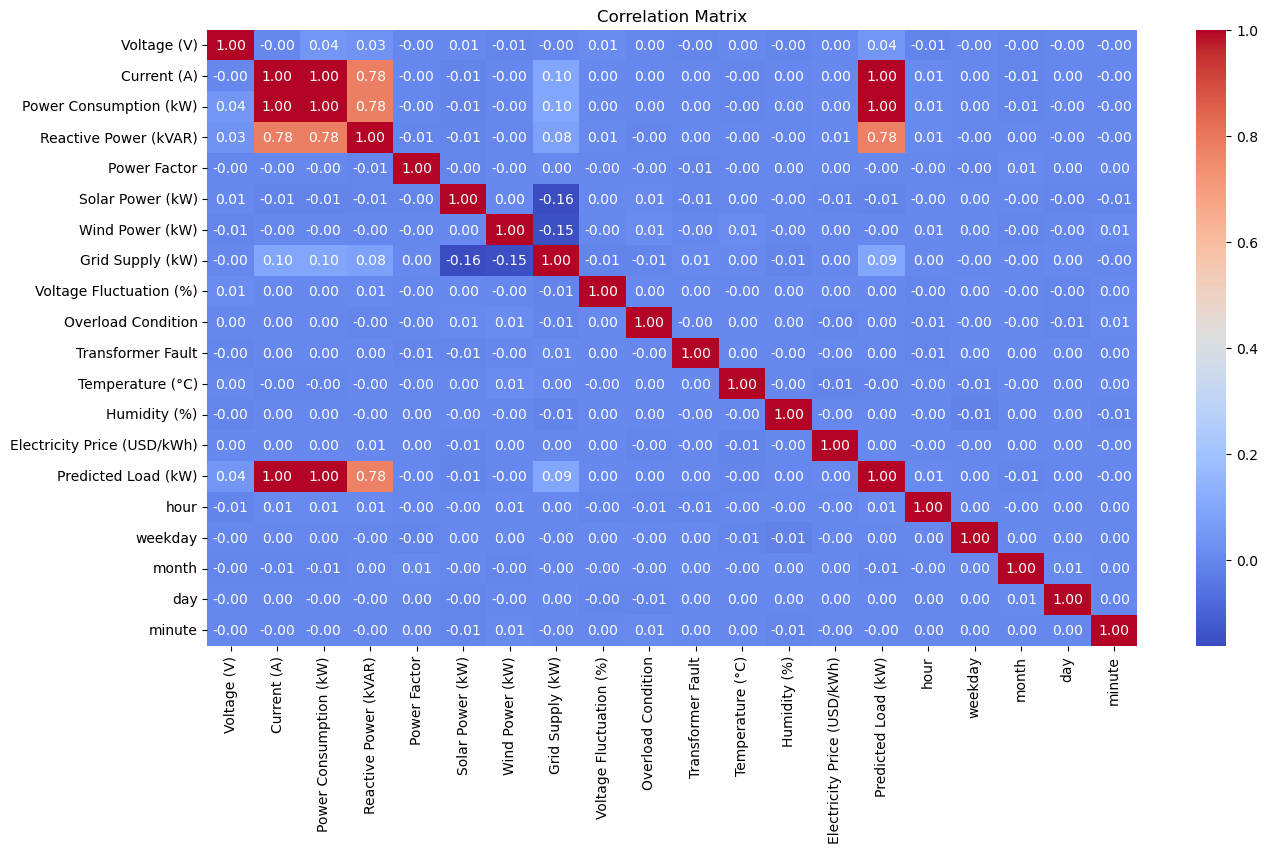

In [49]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Pairplot (Scatter Matrix)
* This lets you see relationships between all pairs of numeric columns as scatter plots:

In [ ]:
pair_column = ['Voltage (V)', 'Current (A)', 'Power Consumption (kW)',
       'Reactive Power (kVAR)', 'Power Factor', 'Solar Power (kW)',
       'Wind Power (kW)', 'Grid Supply (kW)', 'Voltage Fluctuation (%)',
       'Overload Condition', 'Transformer Fault', 'Temperature (°C)',
       'Humidity (%)', 'Electricity Price (USD/kWh)', 'Predicted Load (kW)',
       ]
sns.pairplot(df)
plt.show()


## Using Unscaled Data

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



X = df.drop('Predicted Load (kW)', axis=1)  # All columns except target (Predicted Load)
y = df['Predicted Load (kW)']  # Your target variable (Predicted Load)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Random Forest Regressor

In [61]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
# Predict on the test set
y_pred = model.predict(X_test)

In [73]:

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.16
Root Mean Squared Error (RMSE): 0.21
R² Score: 0.9953


### Plot actual vs predicted load:

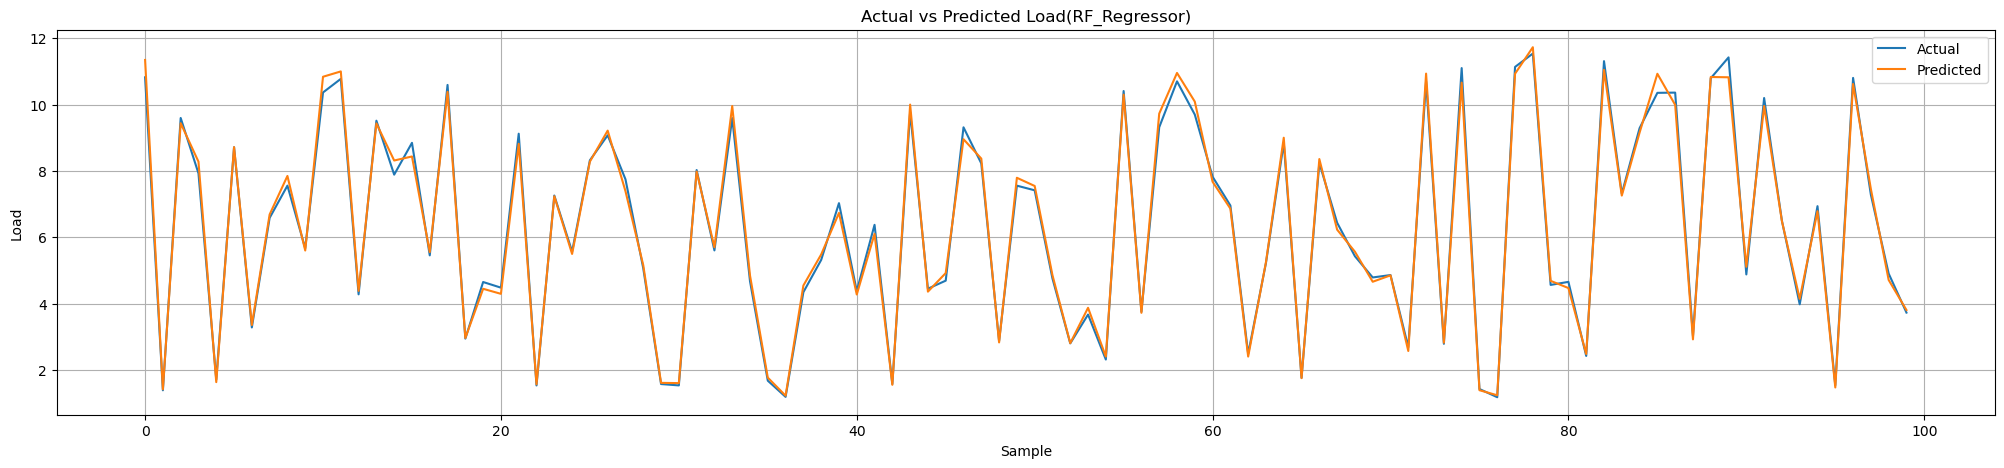

In [78]:
plt.figure(figsize=(25, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Load(RF_Regressor)')
plt.xlabel('Sample')
plt.ylabel('Load')
plt.grid(True)
plt.show()


## Using Linear Regression

In [67]:
Model_1 = LinearRegression()
Model_1.fit(X_train, y_train)

LinearRegression()

In [74]:
# Predict on the test set
y_pred_lin = Model_1.predict(X_test)

In [75]:

# Calculate metrics
mae_1 = mean_absolute_error(y_test, y_pred_lin)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_1 = r2_score(y_test, y_pred_lin)

# Print results
print(f"Mean Absolute Error (MAE): {mae_1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1:.2f}")
print(f"R² Score: {r2_1:.4f}")

Mean Absolute Error (MAE): 0.16
Root Mean Squared Error (RMSE): 0.20
R² Score: 0.9955


### Plot actual vs predicted load:

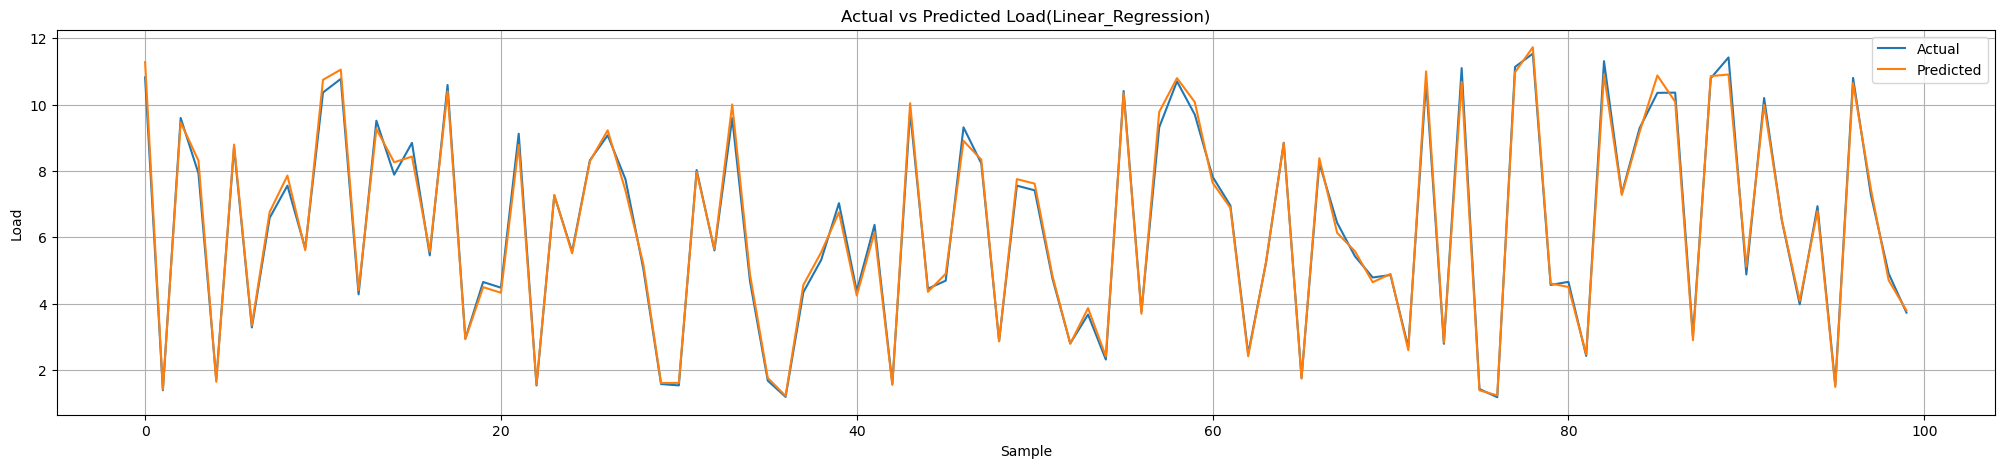

In [79]:
plt.figure(figsize=(25, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred_lin[:100], label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Load(Linear_Regression)')
plt.xlabel('Sample')
plt.ylabel('Load')
plt.grid(True)
plt.show()


## Using Scaled Data

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into features (X_1) and target (y_1)


X_1 = df.drop('Predicted Load (kW)', axis=1)  # All columns except target (Predicted Load)
y_1 = df['Predicted Load (kW)']  # Your target variable (Predicted Load)




In [85]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features
X_scaled = scaler_X.fit_transform(X_1)

# Scale the target (y)
y_scaled = scaler_y.fit_transform(y_1.values.reshape(-1, 1))  # reshape for 2D array input


Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=101)


## RF Regressor

In [87]:
model_A = RandomForestRegressor(n_estimators=100, random_state=101)
model_A.fit(Xs_train, ys_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=101)

In [88]:
# Predict on the test set
ys_pred = model_A.predict(Xs_test)

### Inverse Transform for prediction and scaled Target

In [89]:
# Inverse transform predictions and test data
ys_pred = scaler_y.inverse_transform(ys_pred.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(ys_test.reshape(-1, 1))


### evaluate the Model Performance

In [101]:
# Evaluate the model
mae_scaler = mean_absolute_error(y_test_orig, ys_pred)
rmse_scaler = np.sqrt(mean_squared_error(y_test_orig, ys_pred))
r2_scaler = r2_score(y_test_orig, ys_pred)

print(f"MAE: {mae_scaler:.2f}")
print(f"RMSE: {rmse_scaler:.2f}")
print(f"R²: {r2_scaler:.2f}")


MAE: 0.16
RMSE: 0.21
R²: 1.00


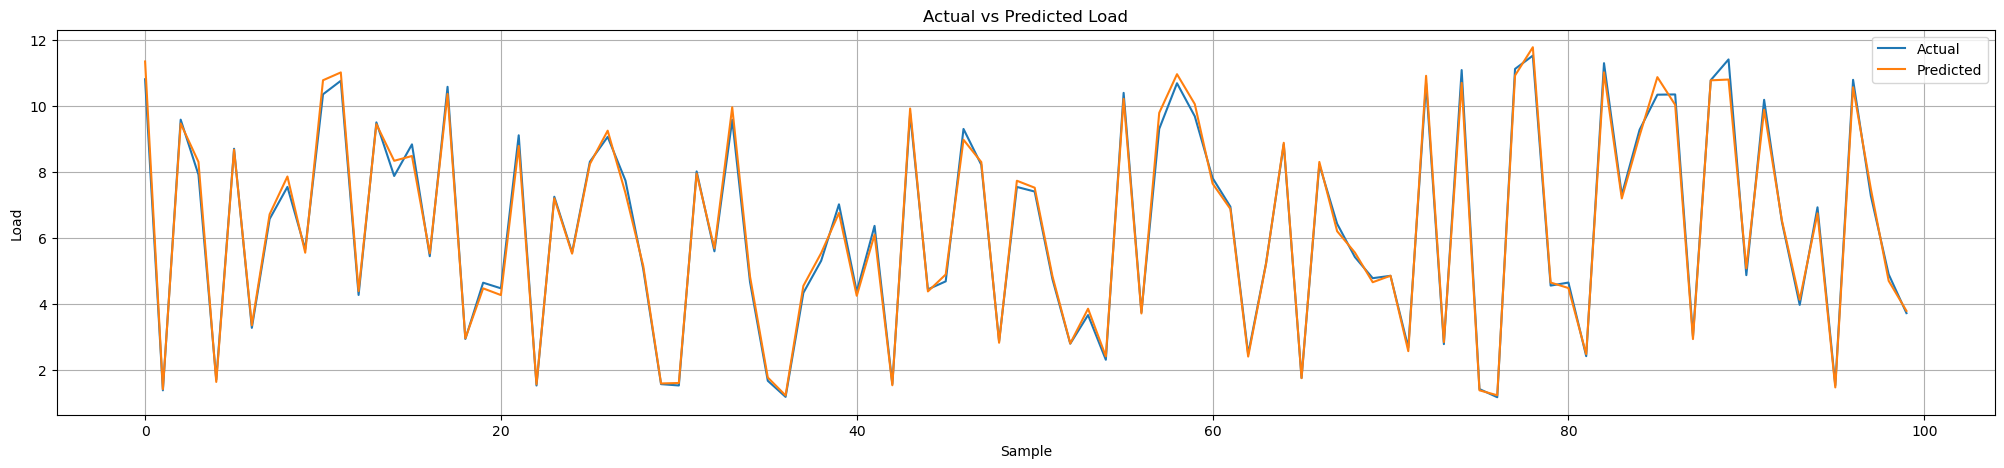

In [92]:
# Plot Actual vs Predicted values
plt.figure(figsize=(25, 5))
plt.plot(y_test_orig[:100], label='Actual')
plt.plot(ys_pred[:100], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Load')
plt.title('Actual vs Predicted Load')
plt.legend()
plt.grid(True)
plt.show()


# LinearRession

In [93]:
model_B = LinearRegression()
model_B.fit(Xs_train, ys_train)

LinearRegression()

In [94]:
# Predict on the test set
ys2_pred = model_B.predict(Xs_test)

### Inverse Transform for prediction and scaled Target

In [95]:
# Inverse transform predictions and test data
ys2_pred = scaler_y.inverse_transform(ys2_pred.reshape(-1, 1))
y_test_orig_2 = scaler_y.inverse_transform(ys_test.reshape(-1, 1))


### evaluate the Model Performance

In [99]:
# Evaluate the model
mae_scaler2 = mean_absolute_error(y_test_orig_2, ys_pred)
rmse_scaler2 = np.sqrt(mean_squared_error(y_test_orig_2, ys_pred))
r2_scaler2 = r2_score(y_test_orig_2, ys_pred)

print(f"MAE: {mae_scaler2:.2f}")
print(f"RMSE: {rmse_scaler2:.2f}")
print(f"R²: {r2_scaler2:.2f}")


MAE: 0.16
RMSE: 0.21
R²: 1.00


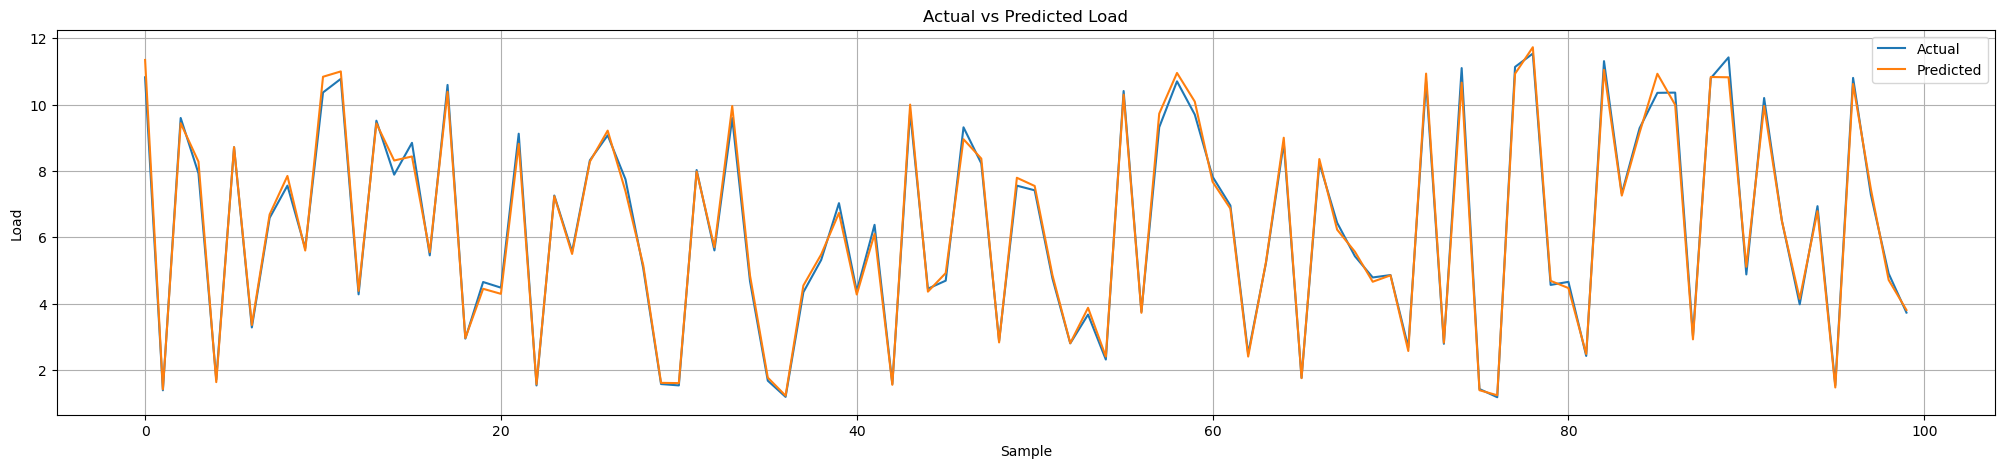

In [103]:
# Plot Actual vs Predicted values
plt.figure(figsize=(25, 5))
plt.plot(y_test_orig_2[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Load')
plt.title('Actual vs Predicted Load')
plt.legend()
plt.grid(True)
plt.show()
